Perceptron with Different Activation Functions:
Train a perceptron model on a 2D binary classification dataset using three activation functions: Sigmoid, ReLU, and Tanh. After training with each activation function, plot the decision boundary before and after training. Compare how the decision boundaries change for each activation function.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NN/Lab 3/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = df[['age', 'chol']].values
y = df['target'].values

In [ ]:
len(X)

303

In [ ]:
len(y)

303

In [ ]:
y = np.where(y == 1, 1, 0)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step Activation Function
def step(x):
    return 1 if x >= 0 else 0

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU Activation Function
def relu(x):
    return np.maximum(0, x)

# Tanh Activation Function
def tanh(x):
    return np.tanh(x)

In [ ]:
# Perceptron Training Function
def perceptron(X, y, activation_function):
    X = np.insert(X, 0, 1, axis=1)  # Add bias term
    lr = 0.1
    w = np.ones(X.shape[1])

    for i in range(1000):
        sample = np.random.randint(len(X))
        y_hat = activation_function(np.dot(X[sample], w))
        w = w - lr * (y[sample] - y_hat) * X[sample]

    return w[0], w[1:]


In [ ]:
# Prediction Function
def predict(X, bias, weights, activation_function):
    linear_output = np.dot(X, weights) + bias
    return np.where(activation_function(linear_output) >= 0.5, 1, 0)


In [ ]:
# Visualization Function
def plot_decision_boundary(X, y, bias, weights, activation_function, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = predict(grid, bias, weights, activation_function)
    preds = preds.reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.6, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.show()


In [ ]:
# List of activation functions to compare
activation_functions = {
    'Sigmoid': sigmoid,
    'ReLU': relu,
    'Tanh': tanh
}

Training perceptron with Sigmoid activation function...


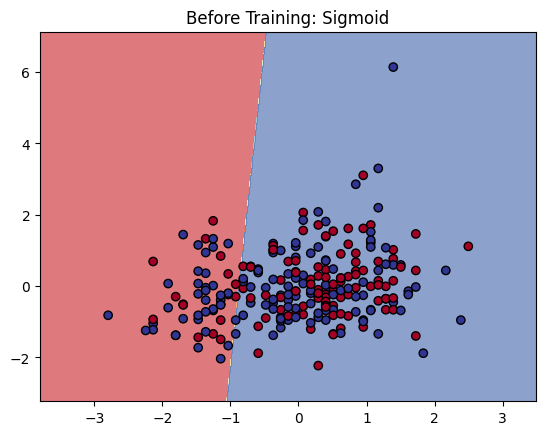

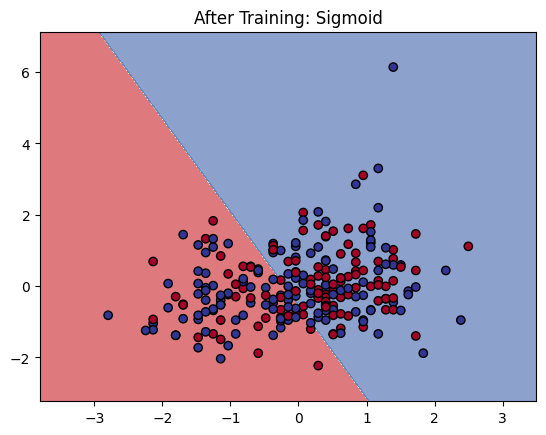

Training perceptron with ReLU activation function...


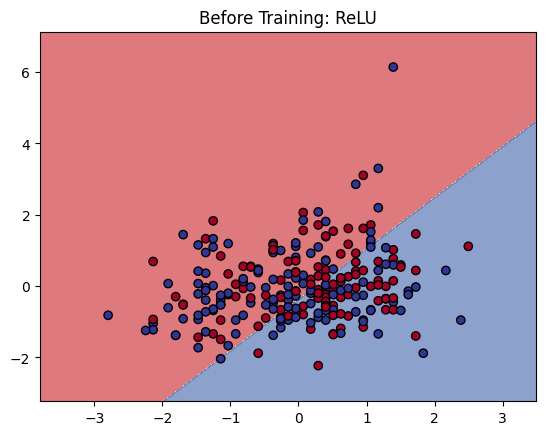

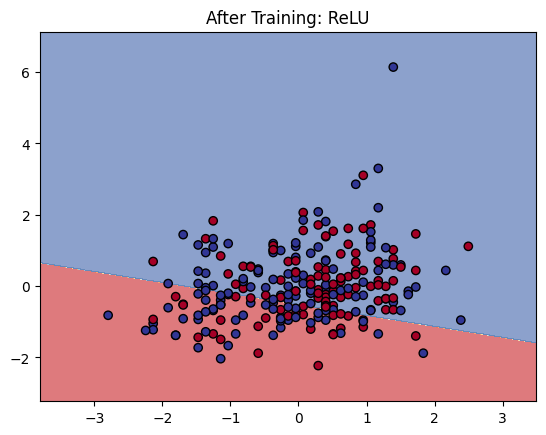

Training perceptron with Tanh activation function...


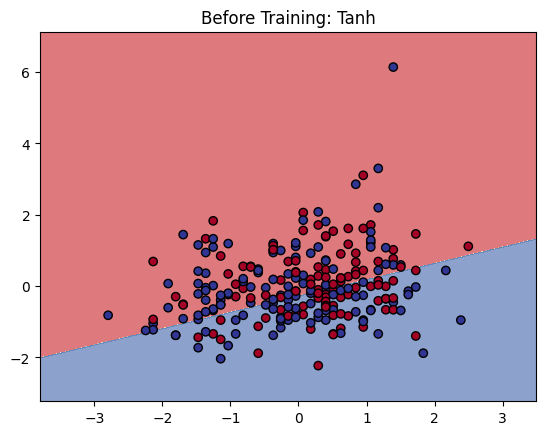

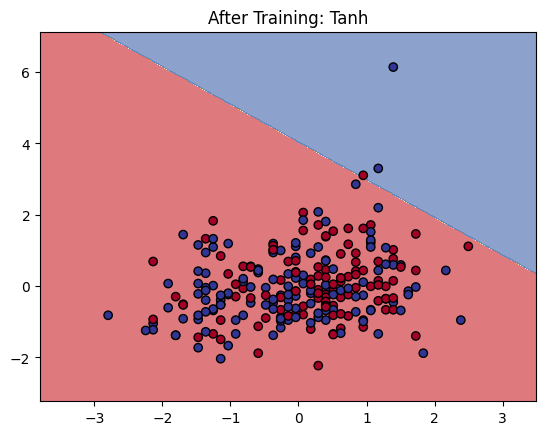

In [ ]:
# Compare decision boundaries for each activation function
for name, activation_function in activation_functions.items():
    print(f"Training perceptron with {name} activation function...")

    # Before training: Random initial weights and bias
    bias_init = np.random.randn()
    weights_init = np.random.randn(X_train.shape[1])

    # Plot the decision boundary before training
    plot_decision_boundary(X_train, y_train, bias_init, weights_init, activation_function, f"Before Training: {name}")

    # Train perceptron with the chosen activation function
    bias, weights = perceptron(X_train, y_train, activation_function)

    # Plot the decision boundary after training
    plot_decision_boundary(X_train, y_train, bias, weights, activation_function, f"After Training: {name}")